# 多层感知机的简洁实现
:label:`sec_mlp_concise`

本节将介绍(**通过高级API更简洁地实现多层感知机**)。


In [1]:
import torch
from torch import nn
from d2l import torch as d2l

## 模型

与softmax回归的简洁实现（ :numref:`sec_softmax_concise`）相比，
唯一的区别是我们添加了2个全连接层（之前我们只添加了1个全连接层）。
第一层是[**隐藏层**]，它(**包含256个隐藏单元，并使用了ReLU激活函数**)。
第二层是输出层。


In [2]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

[**训练过程**]的实现与我们实现softmax回归时完全相同，
这种模块化设计使我们能够将与模型架构有关的内容独立出来。


In [3]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

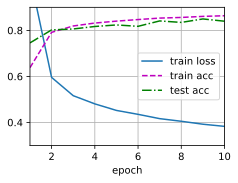

In [4]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [5]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

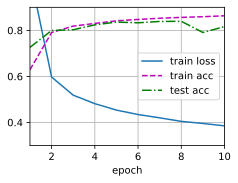

In [7]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer, device='cuda')

## 小结

* 我们可以使用高级API更简洁地实现多层感知机。
* 对于相同的分类问题，多层感知机的实现与softmax回归的实现相同，只是多层感知机的实现里增加了带有激活函数的隐藏层。



## 练习

1. 尝试添加不同数量的隐藏层（也可以修改学习率），怎么样设置效果最好？
1. 尝试不同的激活函数，哪个效果最好？
1. 尝试不同的方案来初始化权重，什么方法效果最好？


## 练习解答

### 3. 尝试不同的方案来初始化权重，什么方法效果最好？

在PyTorch中，初始化神经网络权重的方法有很多，包括一些预定义的初始化方法以及自定义初始化。常见的初始化方法有如下几种：

### 常见初始化方法

1. **均匀分布初始化 (Uniform Initialization)**
    ```python
    torch.nn.init.uniform_(tensor, a=0.0, b=1.0)
    ```
    把`tensor`中的每个元素初始化为`[a, b)`中的一个均匀分布数值。

2. **正态分布初始化 (Normal Initialization)**
    ```python
    torch.nn.init.normal_(tensor, mean=0.0, std=1.0)
    ```
    把`tensor`中的每个元素初始化为符合正态分布的值，均值为`mean`，标准差为`std`。

3. **常数初始化 (Constant Initialization)**
    ```python
    torch.nn.init.constant_(tensor, 1.0)
    ```
    把`tensor`中的每个元素初始化为相同的常数值。

4. **Xavier初始化 (Xavier Initialization, 又称作Glorot Initialization)**
    - 均匀分布形式
      ```python
      torch.nn.init.xavier_uniform_(tensor)
      ```
    - 正态分布形式
      ```python
      torch.nn.init.xavier_normal_(tensor)
      ```

5. **Kaiming初始化 (Kaiming Initialization, 又称作He Initialization)**
    - 均匀分布形式
      ```python
      torch.nn.init.kaiming_uniform_(tensor, a=0, mode='fan_in', nonlinearity='leaky_relu')
      ```
    - 正态分布形式
      ```python
      torch.nn.init.kaiming_normal_(tensor, a=0, mode='fan_in', nonlinearity='leaky_relu')
      ```
### Xavier初始化详解
Xavier初始化（也称为Glorot初始化）是由Xavier Glorot等人在其2010年的论文中提出的一种权重初始化方法，特别适用于带有Sigmoid或Tanh激活函数的神经网络。在使用其他激活函数时，Xavier初始化也表现不错。

### 原理
Xavier初始化的主要思想是使得每层神经元的输入和输出的方差相同，从而避免在前向传播和反向传播过程中信号过大或过小的问题。这有助于保持梯度的稳定，使得训练更加高效和稳定。

具体的Xavier初始化方法是根据层的输入和输出神经元的数量来初始化权重。假设某一层权重矩阵为W，n是输入单元数，m是输出单元数，则权重W的初始化标准如公式所示：

**均匀分布Xavier初始化**：
\[ W \sim U\left(-\sqrt{\frac{6}{n + m}}, \sqrt{\frac{6}{n + m}}\right) \]

**正态分布Xavier初始化**：
\[ W \sim N\left(0, \sqrt{\frac{2}{n + m}}\right) \]

其中，U表示均匀分布，N表示正态分布，n是输入单元数（fan_in），m是输出单元数（fan_out）。

### PyTorch中的实现

在PyTorch中，可以很方便地使用`torch.nn.init`模块中的`xavier_uniform_`和`xavier_normal_`函数来实现Xavier初始化。

#### 1. 均匀分布的Xavier初始化
```python
torch.nn.init.xavier_uniform_(tensor, gain=1.0)
```
- `tensor`是要初始化的权重张量。
- `gain`是一个可选参数，默认值为1.0。可以是一个标量或一个可以广播的张量，通常用于Sigmoid或Tanh激活函数时增益参数是1，但对于ReLU类激活函数可以调整为其他值。

#### 2. 正态分布的Xavier初始化
```python
torch.nn.init.xavier_normal_(tensor, gain=1.0)
```
- `tensor`是要初始化的权重张量。
- `gain`与上述相同。

### 应用示例

以下是如何在PyTorch中应用Xavier初始化的示例：

```python
import torch
import torch.nn as nn

# 定义简单的神经网络
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.init_weights()
    
    def init_weights(self):
        # 使用Xavier均匀分布初始化
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        # 可以任选使用Xavier正态分布初始化
        # nn.init.xavier_normal_(self.fc1.weight)
        # nn.init.xavier_normal_(self.fc2.weight)
        # nn.init.xavier_normal_(self.fc3.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 初始化神经网络
model = SimpleNet()
```

如果想在网络定义后统一进行初始化，也可以通过以下方式：

```python
def xavier_init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)

model = SimpleNet()
model.apply(xavier_init_weights)
```

### 其他考虑因素
- **增益参数(gain)**: 对于不同的激活函数，可以调整增益参数以优化训练效果。例如，对于ReLU及其变体，建议使用\( sqrt(2) \)作为增益因子。
- **层的偏置初始化**: 单独初始化层的偏置，对于Xavier初始化，通常将偏置初始化为零或使用其他合适的常数初始化。
- **模型复杂性和网络深度**: 随着网络层数增加，选择和合理配置初始化方法变得更加重要。Xavier初始化在较浅层网络中表现良好，但对于非常深的网络，可能需要配合其他初始化方法和技巧。

### 总结
Xavier初始化是一种在深度网络训练中常用的权重初始化方法，能够有效地稳定训练过程，并且在许多情况下表现良好。通过结合网络的具体结构、激活函数和增益因子，可以进一步优化Xavier初始化的效果。

### KaiMing 初始化详解

KaiMing初始化（也称为He初始化）是由何凯明等人提出的初始化方法，特别适用于ReLU激活函数。其主要思想是根据前一层的节点数量来调整方差，以保持前向传播和反向传播时信号的方差一致。

- **均匀分布的KaiMing初始化**
  ```python
  torch.nn.init.kaiming_uniform_(tensor, a=0, mode='fan_in', nonlinearity='relu')
  ```
  其中：
  - `tensor`: 需要初始化的Tensor。
  - `a`: 对`leaky_relu`激活函数中的负斜率，对于普通ReLU来说，`a=0`。
  - `mode`: 一般为`fan_in`，表示方差基于输入层神经元数量（适用于前向传播）。
  - `nonlinearity`: 激活函数类型，主要用来调整参数区别，例如`'relu'`或`'leaky_relu'`。

- **正态分布的KaiMing初始化**
  ```python
  torch.nn.init.kaiming_normal_(tensor, a=0, mode='fan_in', nonlinearity='relu')
  ```

### 应用方法

你可以通过以下几种方式在PyTorch模型中应用权重初始化：

#### 方法一：在定义模型时应用
```python
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)
        self.init_weights()
        
    def init_weights(self):
        nn.init.kaiming_uniform_(self.fc1.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.fc2.weight, mode='fan_in', nonlinearity='relu')
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()
```

#### 方法二：定义后应用
```python
def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')

net = Net()
net.apply(weights_init)
```

通过这些初始化方法，可以有效地提高模型训练的效率和稳定性。选择合适的初始化方法是构建深度学习模型的关键步骤之一。

[Discussions](https://discuss.d2l.ai/t/1802)
